In [1]:
# Import necessay libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load needed data set for hierarchical clustering analysis
df = pd.read_csv('C://Users//cseba//Documents//WGU//D212 Data Mining II//Performance Assessment//Data Files and Associated Dictionary Files//churn_clean.csv')

In [3]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
# Drop columns not needed for clustering.
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 
                     'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Age', 'Income', 
                     'Marital', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
                      'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 
                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Item1   10000 non-null  int64
 1   Item2   10000 non-null  int64
 2   Item3   10000 non-null  int64
 3   Item4   10000 non-null  int64
 4   Item5   10000 non-null  int64
 5   Item6   10000 non-null  int64
 6   Item7   10000 non-null  int64
 7   Item8   10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [6]:
# Renaming the eight survey items for unique variable names and understanding.
df.rename(columns = {'Item1':'TimelyResponse',
 'Item2':'TimelyFixes',
 'Item3':'TimelyReplacements',
 'Item4':'Reliability',
 'Item5':'Options',
 'Item6':'RespectfulResponse',
 'Item7':'CourteousExchange',
 'Item8':'ActiveListening'},
 inplace=True)

In [7]:
# Run .info to view applied rename changes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TimelyResponse      10000 non-null  int64
 1   TimelyFixes         10000 non-null  int64
 2   TimelyReplacements  10000 non-null  int64
 3   Reliability         10000 non-null  int64
 4   Options             10000 non-null  int64
 5   RespectfulResponse  10000 non-null  int64
 6   CourteousExchange   10000 non-null  int64
 7   ActiveListening     10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [8]:
df

,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
0,5,5,5,3,4,4,3,4
1,3,4,3,3,4,3,4,4
2,4,4,2,4,4,3,3,3
3,4,4,4,2,5,4,3,3
4,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...
9995,3,2,3,3,4,3,2,3
9996,4,5,5,4,4,5,2,5
9997,4,4,4,4,4,4,4,5
9998,4,4,6,4,3,3,5,4


In [9]:
# Check for duplicates within the dataset and drop them.
df = df.dropna()

In [10]:
# Confirmed dropped duplicates if any exist.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   TimelyResponse      10000 non-null  int64
 1   TimelyFixes         10000 non-null  int64
 2   TimelyReplacements  10000 non-null  int64
 3   Reliability         10000 non-null  int64
 4   Options             10000 non-null  int64
 5   RespectfulResponse  10000 non-null  int64
 6   CourteousExchange   10000 non-null  int64
 7   ActiveListening     10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [11]:
# Inverse the data rating categorical numeric values since 1 = most important and 8 = least important. 
columns_to_invert = ['TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability', 'Options', 'RespectfulResponse',
                     'CourteousExchange', 'ActiveListening']

# Invert the values in the specified columns
df[columns_to_invert] = 9 - df[columns_to_invert]

# View the applied inversions of the data set.
df

,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
0,4,4,4,6,5,5,6,5
1,6,5,6,6,5,6,5,5
2,5,5,7,5,5,6,6,6
3,5,5,5,7,4,5,6,6
4,5,5,5,6,5,5,5,4
...,...,...,...,...,...,...,...,...
9995,6,7,6,6,5,6,7,6
9996,5,4,4,5,5,4,7,4
9997,5,5,5,5,5,5,5,4
9998,5,5,3,5,6,6,4,5


In [12]:
# Extract cleaned dataframe as it is ready for hierarchical clustering analysis.
df.to_csv(r'C:\Users\cseba\Documents\WGU\D212 Data Mining II\Performance Assessment\OFM3 Task 1 - Clustering Techniques\D212_Cleaned_Script_Task1.csv')

In [13]:
X = df.iloc[:,:]

In [14]:
# Perform the clustering using different affinity and linkage combinations
# Using euclidean for affinity
affinities = ['euclidean']

# the different linkages to test with euclidean
linkages = ['ward', 'complete', 'average']
best_score = -1
best_affinity = ''
best_linkage = ''

for affinity in affinities:
    for linkage_method in linkages:
        clustering = AgglomerativeClustering(n_clusters = 2, affinity = affinity, linkage = linkage_method)
        labels = clustering.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        print(f"Affinity: {affinity}, Linkage: {linkage_method}, Silhouette Score: {silhouette_avg}")
        
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_affinity = affinity
            best_linkage = linkage_method

print(f"\nBest Silhouette Score: {best_score}")
print(f"Best Affinity: {best_affinity}")
print(f"Best Linkage: {best_linkage}")

Affinity: euclidean, Linkage: ward, Silhouette Score: 0.16630873939407875
Affinity: euclidean, Linkage: complete, Silhouette Score: 0.1761525006716244
Affinity: euclidean, Linkage: average, Silhouette Score: 0.3144967538420036

Best Silhouette Score: 0.3144967538420036
Best Affinity: euclidean
Best Linkage: average


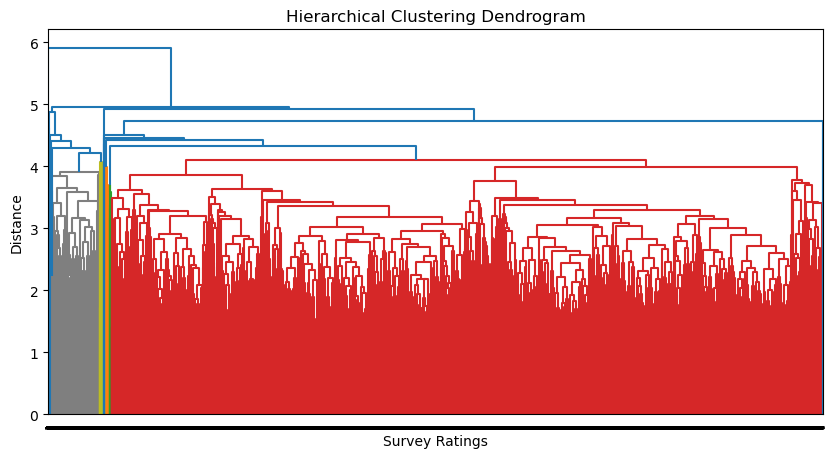

In [15]:
# Executing the hierarchical clustering using the euclidean affinity and the best linkage
clustering = AgglomerativeClustering(n_clusters = 2, affinity = best_affinity, linkage = best_linkage)
labels = clustering.fit_predict(X)

# Create the dendrogram
Z = linkage(X, method = best_linkage, metric = best_affinity)
plt.figure(figsize=(10, 5))
dendrogram(Z, labels = labels)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Survey Ratings')
plt.ylabel('Distance')
plt.show()

In [16]:
# Naming each of the clusters and show the results
unique_labels = np.unique(labels)
for cluster in unique_labels:
    indices = np.where(labels == cluster)[0]
    cluster_mean = np.mean(X.iloc[indices], axis=0)
    print(f"Cluster {cluster} statistics:")
    print("Mean:")
    print(cluster_mean)
    print("Standard Deviation:")
    print(np.std(X.iloc[indices], axis=0))
    print()

Cluster 0 statistics:
Mean:
TimelyResponse        5.511966
TimelyFixes           5.497847
TimelyReplacements    5.515971
Reliability           5.500150
Options               5.509162
RespectfulResponse    5.502653
CourteousExchange     5.491339
ActiveListening       5.503955
dtype: float64
Standard Deviation:
TimelyResponse        1.034661
TimelyFixes           1.031724
TimelyReplacements    1.024688
Reliability           1.023933
Options               1.023305
RespectfulResponse    1.033759
CourteousExchange     1.028190
ActiveListening       1.028316
dtype: float64

Cluster 1 statistics:
Mean:
TimelyResponse        3.384615
TimelyFixes           3.230769
TimelyReplacements    3.230769
Reliability           7.307692
Options               3.923077
RespectfulResponse    5.538462
CourteousExchange     4.846154
ActiveListening       5.846154
dtype: float64
Standard Deviation:
TimelyResponse        1.211386
TimelyFixes           0.696568
TimelyReplacements    0.973009
Reliability          

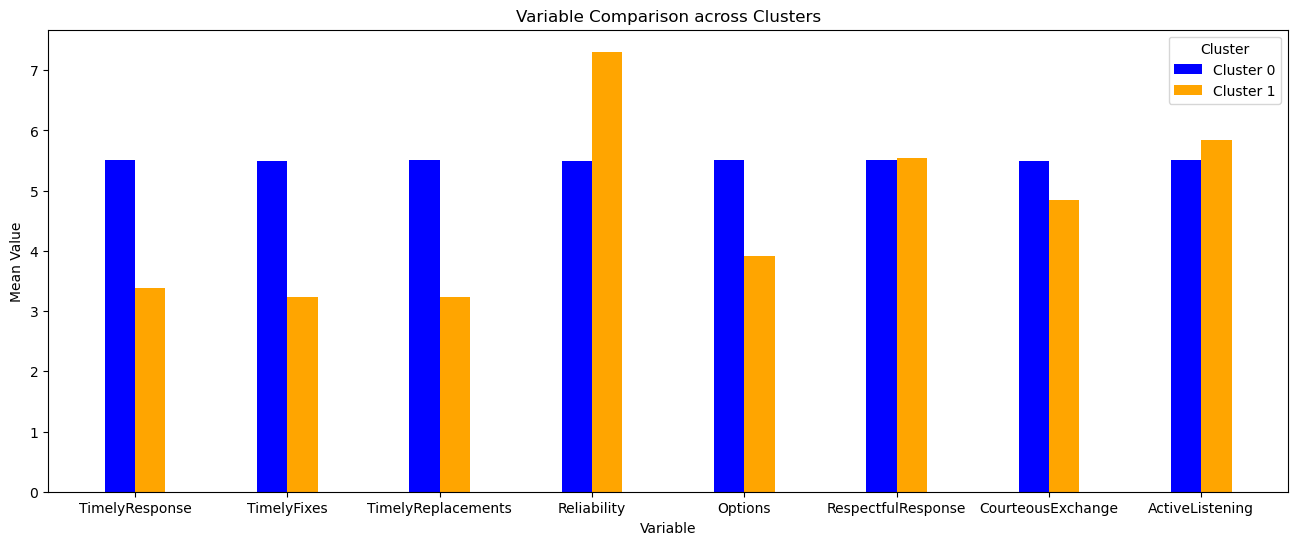

Cluster 0: 9987 observations
Cluster 1: 13 observations


In [17]:
# Configuring the different labels for each cluster to help generate a visualization comparing each cluster.

unique_labels, cluster_counts = np.unique(labels, return_counts=True)
n_clusters = len(unique_labels)
n_variables = X.shape[1] 

# Calculate the mean of each variable within each cluster
cluster_means = np.zeros((n_clusters, n_variables))
for cluster in unique_labels:
    indices = np.where(labels == cluster)[0]
    cluster_means[cluster] = np.mean(X.iloc[indices], axis=0)

# Plot the bar chart
plt.figure(figsize=(16, 6))
x = np.arange(n_variables)
width = 0.2 

# adding different colors to the bars to distinguish the difference between each cluster
colors = ['blue', 'orange'] 

for i in range(n_clusters):
    plt.bar(x + i * width, cluster_means[i], width = width, color = colors[i], label = f'Cluster {i}')

# On the x-axis, putting the different variable names to be plotted
plt.xticks(x + (n_clusters - 1) * width / 2, X.columns)
plt.title('Variable Comparison across Clusters')
plt.xlabel('Variable')
plt.ylabel('Mean Value')
plt.legend(title='Cluster')

plt.show()

# Calculate the total number of observations in each cluster
for cluster, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {cluster}: {count} observations")

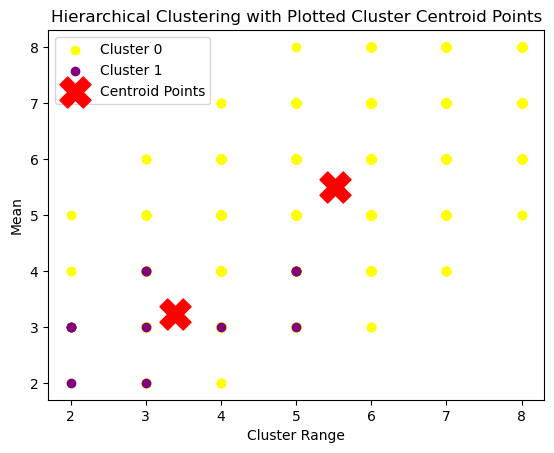

In [18]:
# Calculate and plot the centroid of each cluster
centroids = np.zeros((n_clusters, n_variables))
for cluster in unique_labels:
    indices = np.where(labels == cluster)[0]
    centroids[cluster] = np.mean(X.iloc[indices], axis=0)

# Pick colors to separate each cluster
colors = ['yellow', 'purple']

# Plot the scatter plot with centroids with red X's
for cluster in unique_labels:
    indices = np.where(labels == cluster)[0]
    plt.scatter(X.iloc[indices, 0], X.iloc[indices, 1], color = colors[cluster], label = f'Cluster {cluster}')

plt.scatter(centroids[:, 0], centroids[:, 1], color = 'red', marker = 'X', s = 500, 
            label = 'Centroid Points')

plt.title('Hierarchical Clustering with Plotted Cluster Centroid Points')
plt.xlabel('Cluster Range')
plt.ylabel('Mean')
plt.legend()
plt.show()

In [19]:
# Extract script of dataframe as hierarchical clustering analysis has been executed.
df.to_csv(r'C:\Users\cseba\Documents\WGU\D212 Data Mining II\Performance Assessment\OFM3 Task 1 - Clustering Techniques\D212_HCA_Script_Task1.csv')